In [4]:
import pandas as pd
%pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('../data/IEA_EDGAR_CO2_1970-2021_byyear.csv')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
df

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CO2,bio,0.022397,0.021412,...,1.337603,2.371433,2.497066,2.970795,2.438748,2.509098,3.096665,3.255611,3.378899,3.378899
1,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,CO2,bio,12.228673,11.690942,...,9.856529,6.886571,6.890052,7.378661,7.853166,9.340506,7.365402,7.718069,8.047569,8.047569
2,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,CO2,bio,0.879948,0.845336,...,6.473158,6.021210,6.630579,5.848465,6.489807,6.417006,6.410401,4.571319,7.808080,7.808080
3,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,CO2,bio,0.058367,0.056820,...,1.714841,1.721481,1.838701,2.157164,1.972983,2.068339,2.147736,2.004358,2.450398,2.450398
4,Non-Annex_I,Rest Central America,ABW,Aruba,1.B.1,Solid Fuels,CO2,bio,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.A.4,Other Process Uses of Carbonates,CO2,fossil,NaN,NaN,...,1.753279,2.182478,1.474799,1.951282,1.528562,1.739092,1.509467,1.374865,1.389039,1.417387
4769,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.B,Chemical Industry,CO2,fossil,92.565000,155.040000,...,63.750000,68.850000,56.100000,58.800000,10.500000,31.500000,33.600000,10.500000,10.500000,NaN
4770,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.C,Metal Industry,CO2,fossil,1357.949642,1202.712467,...,178.100000,195.078000,278.343000,150.261800,185.640000,185.640000,234.000000,228.743089,222.373569,310.070187
4771,Non-Annex_I,Southern_Africa,ZWE,Zimbabwe,2.D,Non-Energy Products from Fuels and Solvent Use,CO2,fossil,22.738632,23.553464,...,57.840742,57.879892,58.915828,57.958218,58.034373,58.111482,58.189518,59.330242,54.166537,57.980658


# Networks

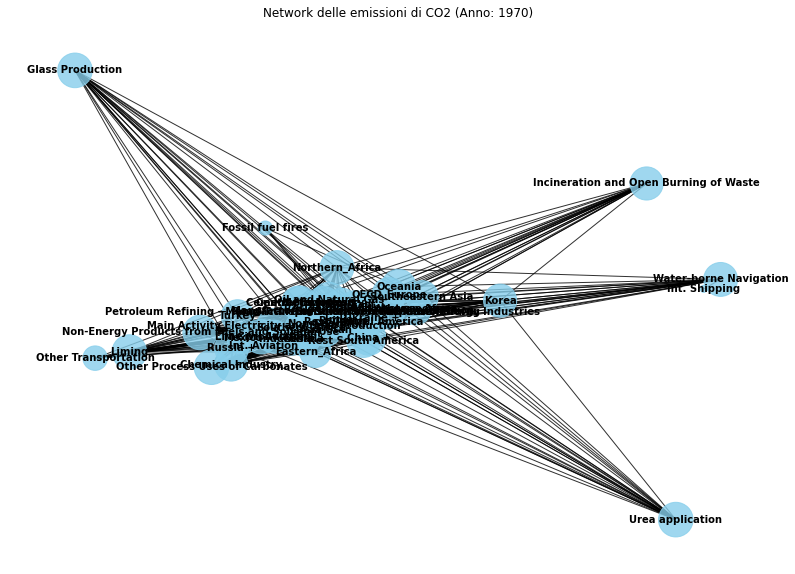

In [12]:


# Selezioniamo solo le colonne di interesse
df_network = df[["C_group_IM24_sh", "ipcc_code_2006_for_standard_report_name", "Y_1970"]]

# Rimuoviamo le righe con valori mancanti nella colonna "Y_1970"
df_network = df_network.dropna(subset=["Y_1970"])
# Creiamo un grafo indiretto (non diretto)
G = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_network.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    G.add_node(country_code, label=country_code)
    G.add_node(ipcc_code, label=ipcc_code)

# Aggiungiamo gli archi al grafo con i pesi basati su "Y_1970"
for _, row in df_network.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    weight = row["Y_1970"]

    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G.has_edge(country_code, ipcc_code):
        G[country_code][ipcc_code]['weight'] += weight
    else:
        G.add_edge(country_code, ipcc_code, weight=weight)

# Resto del codice per il plot del grafo rimane invariato

# Posizionamento dei nodi nel plot del grafo
pos = nx.spring_layout(G, seed=42)
# Dimensione dei nodi proporzionale al grado
node_size = [v * 50 for v in dict(G.degree()).values()]

# Etichette dei nodi
node_labels = nx.get_node_attributes(G, "label")

# Peso degli archi
edge_weights = nx.get_edge_attributes(G, "weight")

# Creazione del plot del grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx(G,pos,  node_size=node_size, with_labels=False, node_color="skyblue", alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8, font_color="red")

# Titolo del plot
plt.title("Network delle emissioni di CO2 (Anno: 1970)")

# Mostrare il plot del grafo
plt.axis("off")
plt.show()


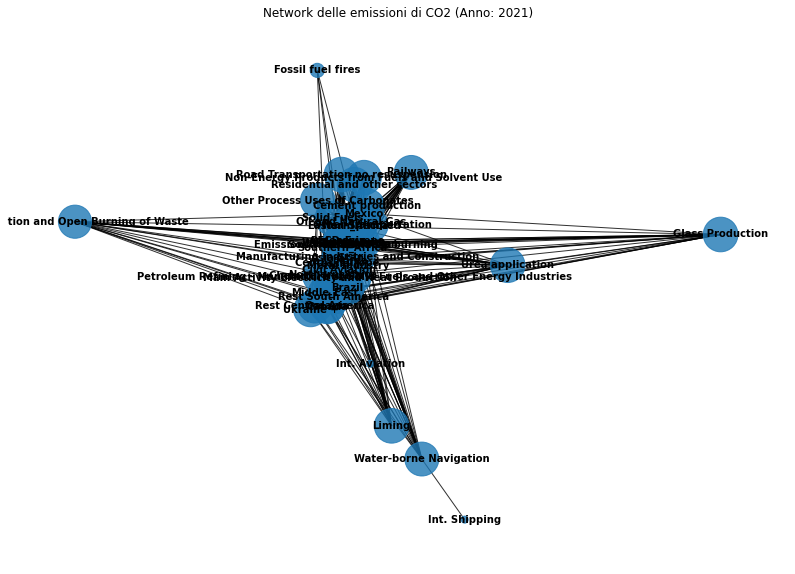

In [26]:


# Selezioniamo solo le colonne di interesse
df_network_21 = df[["C_group_IM24_sh", "ipcc_code_2006_for_standard_report_name", "Y_2021"]]

# Rimuoviamo le righe con valori mancanti nella colonna "Y_1970"
df_network_21 = df_network_21.dropna(subset=["Y_2021"])
# Creiamo un grafo indiretto (non diretto)
G_21 = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_network_21.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    G_21.add_node(country_code, color="red", label=country_code)
    G_21.add_node(ipcc_code, label=ipcc_code)

# Aggiungiamo gli archi al grafo con i pesi basati su "Y_1970"
for _, row in df_network_21.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    weight = row["Y_2021"]

    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G_21.has_edge(country_code, ipcc_code):
        G_21[country_code][ipcc_code]['weight'] += weight
    else:
        G_21.add_edge(country_code, ipcc_code, weight=weight)

# Resto del codice per il plot del grafo rimane invariato

# Posizionamento dei nodi nel plot del grafo
pos = nx.spring_layout(G_21, seed=42)
# Dimensione dei nodi proporzionale al grado
node_size = [v * 50 for v in dict(G_21.degree()).values()]

# Etichette dei nodi
node_labels = nx.get_node_attributes(G_21, "label")

# Peso degli archi
edge_weights = nx.get_edge_attributes(G_21, "weight")

# Creazione del plot del grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx(G_21,pos,  node_size=node_size, with_labels=False, alpha=0.8)
nx.draw_networkx_labels(G_21, pos, labels=node_labels, font_size=10, font_weight="bold")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8, font_color="red")

# Titolo del plot
plt.title("Network delle emissioni di CO2 (Anno: 2021)")

# Mostrare il plot del grafo
plt.axis("off")
plt.show()


## colors

differentiation of colors for the two groups of nodes

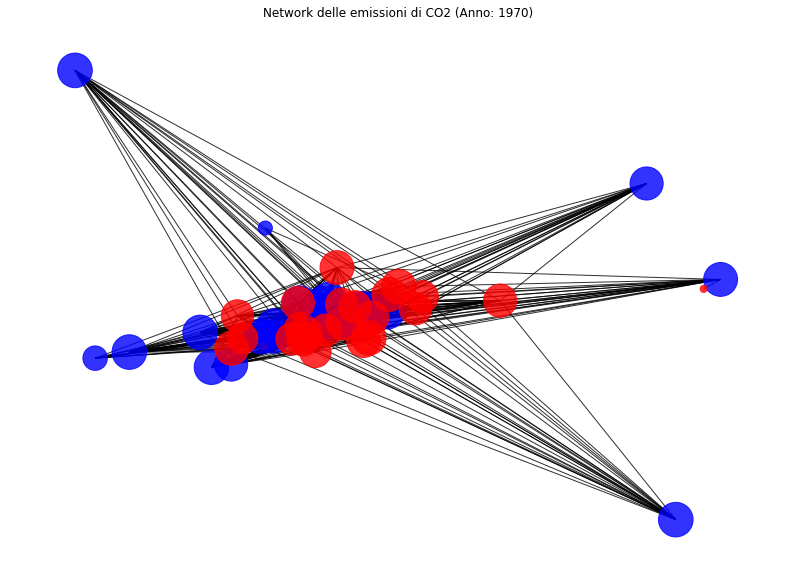

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



# Selezioniamo solo le colonne di interesse
df_network = df[["C_group_IM24_sh", "ipcc_code_2006_for_standard_report_name", "Y_1970"]]

# Rimuoviamo le righe con valori mancanti nella colonna "Y_1970"
df_network = df_network.dropna(subset=["Y_1970"])

# Creiamo un grafo indiretto (non diretto)
G = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_network.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    G.add_node(country_code, label=country_code, color="red")  # Nodi dal "C_group_IM24_sh" saranno rossi
    G.add_node(ipcc_code, label=ipcc_code, color="blue")        # Nodi non dal "C_group_IM24_sh" saranno blu

# Aggiungiamo gli archi al grafo con i pesi basati su "Y_1970"
for _, row in df_network.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    weight = row["Y_1970"]

    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G.has_edge(country_code, ipcc_code):
        G[country_code][ipcc_code]['weight'] += weight
    else:
        G.add_edge(country_code, ipcc_code, weight=weight)

# Posizionamento dei nodi nel plot del grafo
pos = nx.spring_layout(G, seed=42)

# Dimensione dei nodi proporzionale al grado
node_size = [v * 50 for v in dict(G.degree()).values()]

# Colori dei nodi
node_colors = [data["color"] for _, data in G.nodes(data=True)]

# Etichette dei nodi
node_labels = nx.get_node_attributes(G, "label")

# Peso degli archi
edge_weights = nx.get_edge_attributes(G, "weight")

# Creazione del plot del grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx(G, pos, node_size=node_size, node_color=node_colors, with_labels=False, alpha=0.8)
#nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8, font_color="red")

# Titolo del plot
plt.title("Network delle emissioni di CO2 (Anno: 1970)")

# Mostrare il plot del grafo
plt.axis("off")
plt.show()


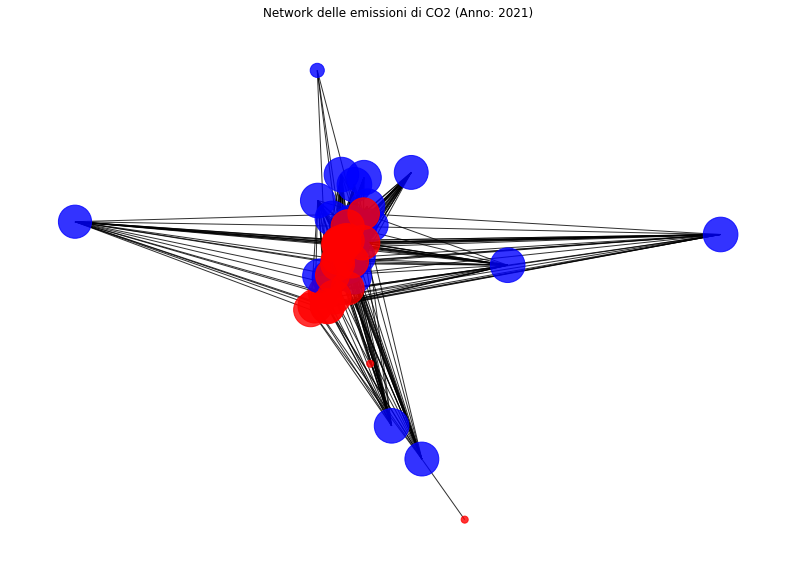

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Selezioniamo solo le colonne di interesse
df_network = df[["C_group_IM24_sh", "ipcc_code_2006_for_standard_report_name", "Y_2021"]]

# Rimuoviamo le righe con valori mancanti nella colonna "Y_1970"
df_network = df_network.dropna(subset=["Y_2021"])

# Creiamo un grafo indiretto (non diretto)
G2 = nx.Graph()

# Aggiungiamo i nodi al grafo
for _, row in df_network.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    G2.add_node(country_code, label=country_code, color="red")  # Nodi dal "C_group_IM24_sh" saranno rossi
    G2.add_node(ipcc_code, label=ipcc_code, color="blue")        # Nodi non dal "C_group_IM24_sh" saranno blu

# Aggiungiamo gli archi al grafo con i pesi basati su "Y_1970"
for _, row in df_network.iterrows():
    country_code = row["C_group_IM24_sh"]
    ipcc_code = row["ipcc_code_2006_for_standard_report_name"]
    weight = row["Y_2021"]

    # Se esiste già un arco tra i due nodi, aggiorna il peso
    if G2.has_edge(country_code, ipcc_code):
        G2[country_code][ipcc_code]['weight'] += weight
    else:
        G2.add_edge(country_code, ipcc_code, weight=weight)

# Posizionamento dei nodi nel plot del grafo
pos = nx.spring_layout(G2, seed=42)

# Dimensione dei nodi proporzionale al grado
node_size = [v * 50 for v in dict(G2.degree()).values()]

# Colori dei nodi
node_colors = [data["color"] for _, data in G2.nodes(data=True)]

# Etichette dei nodi
node_labels = nx.get_node_attributes(G2, "label")

# Peso degli archi
edge_weights = nx.get_edge_attributes(G2, "weight")

# Creazione del plot del grafo
plt.figure(figsize=(14, 10))
nx.draw_networkx(G2, pos, node_size=node_size, node_color=node_colors, with_labels=False, alpha=0.8)
#nx.draw_networkx_labels(G2, pos, labels=node_labels, font_size=10, font_weight="bold")
#nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_weights, font_size=8, font_color="red")

# Titolo del plot
plt.title("Network delle emissioni di CO2 (Anno: 2021)")

# Mostrare il plot del grafo
plt.axis("off")
plt.show()
